In [1]:
import nltk

In [2]:
import numpy as np

In [ ]:
#nltk.download_shell()

In [3]:
txt_file_path = 'C:\\Users\\peech\\OneDrive\\Documents\\SMSSpamCollection'

In [4]:
messages = [line.rstrip() for line in open(txt_file_path)]

In [5]:
len(messages)

5574

In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
import pandas as pd

In [10]:
messages = pd.read_csv(txt_file_path, sep = '\t', names = ['Label', 'Message'])

In [11]:
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [14]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messages['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [16]:
def getMessageLength(message):
    return len(message)

messages['Length'] = [getMessageLength(mess) for mess in messages['Message']]

In [17]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

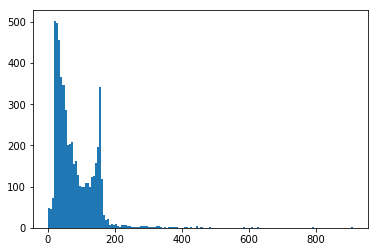

In [19]:
plt.hist(messages['Length'], bins = 150)
plt.show()

In [20]:
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [21]:
messages[(messages['Length'] == 910)]

,Label,Message,Length
1085,ham,For me the love should start with attraction.i...,910


In [22]:
messages[messages['Length'] == 910]

,Label,Message,Length
1085,ham,For me the love should start with attraction.i...,910


In [22]:
messages['Message'][1085]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [23]:
messages[(messages['Length'] == 910)]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [24]:
messages[(messages['Label'] == 'spam')]['Length'].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: Length, dtype: float64

In [25]:
messages[(messages['Label'] == 'ham')]['Length'].describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: Length, dtype: float64

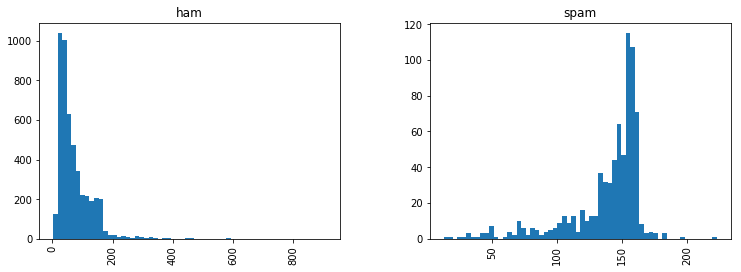

In [23]:
messages.hist(column = 'Length', by = 'Label', bins = 60, figsize = (12,4))
plt.show()

In [24]:
import string

In [25]:
mess = 'Sample Message! Notice: It has punctuation.'

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
np.array([c for c in mess if c not in string.punctuation])

array(['S', 'a', 'm', 'p', 'l', 'e', ' ', 'M', 'e', 's', 's', 'a', 'g',
       'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'I', 't', ' ', 'h',
       'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o',
       'n'], dtype='<U1')

In [28]:
nopunc = [c for c in mess if c not in string.punctuation]

In [29]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [30]:
from nltk.corpus import stopwords

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
nopunc = ''.join(nopunc)

In [33]:
nopunc

'Sample Message Notice It has punctuation'

In [34]:
x = ['a', 'b', 'c', 'd']
x

['a', 'b', 'c', 'd']

In [35]:
''.join(x)

'abcd'

In [36]:
'+'.join(x)

'a+b+c+d'

In [37]:
nopunc.split()

['Sample', 'Message', 'Notice', 'It', 'has', 'punctuation']

In [38]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

In [39]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
mess

'Sample Message! Notice: It has punctuation.'

In [41]:
text_process(mess)

['Sample', 'Message', 'Notice', 'punctuation']

In [42]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
messages['Message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [44]:
messages['Message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
#bow = Bag of Words
bow_transformer = CountVectorizer(analyzer = text_process)

In [47]:
bow_transformer.fit(messages['Message'])

CountVectorizer(analyzer=<function text_process at 0x000002C160EEAA60>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [52]:
len(bow_transformer.vocabulary_)

11425

In [53]:
mess4 = messages['Message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [54]:
bow4 = bow_transformer.transform([mess4])
print(bow4) # 7 unique words in mess4 after removing the common stopwords; 2 of them appear twice and the rest only once

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [55]:
print(bow4.shape) # 7 unique words in mess4 after removing the common stopwords; 2 of them appear twice and the rest only once

(1, 11425)


In [56]:
bow_transformer.get_feature_names()[4068] # Letter 'U' as a word; Shows up twice

'U'

In [57]:
bow_transformer.get_feature_names()[9554] # 'Say' as a word; Shows up twice

'say'

In [58]:
messages_bow = bow_transformer.transform(messages['Message'])

In [146]:
#print(messages_bow)

In [59]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [60]:
len(messages['Message'])

5572

In [61]:
messages_bow.nnz #non-zero values 

50548

In [62]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'. format(sparsity)) # comparing the number of non-zero messages vs the actual total number of messages

sparsity: 0.07940295412668218


In [63]:
from sklearn.feature_extraction.text import TfidfTransformer # term-frequency and inverse document frequency

In [64]:
tfidf_transformer = TfidfTransformer().fit(messages_bow) # term-frequency and inverse document frequency

In [65]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4) # interpret these values as weight values for each of these words vs. the actual document
# messages represented as numerical vectors; can finally train the spam/ham classifier

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [66]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [67]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [68]:
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [69]:
from sklearn.naive_bayes import MultinomialNB # can use any sort of classification algorithms
                                              # for a variety of reasons the Naive Bayes Classifier algorithm is a good choice

In [70]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['Label'])  # Model that can predict spam vs. ham messages

In [71]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [72]:
messages['Label'][3]

'ham'

In [73]:
all_predict = spam_detect_model.predict(messages_tfidf)

In [74]:
all_predict

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [75]:
from sklearn.cross_validation import train_test_split

C:\Users\peech\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [76]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['Message'], messages['Label'], test_size = 0.2)

In [79]:
from sklearn.pipeline import Pipeline # what you will be doing when working with real world text data
                                      # sklearn has data pipeline feature which will save so much more time
                                      # summarize all of the steps we just did into a pipeline so we don't have to constantly repeat everything for different sets of data

In [80]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # string to token integer counts,
    ('tfidf', TfidfTransformer()), # integer counts to weighted tfidf scores
    ('classifier', MultinomialNB()) # classifier
])

In [81]:
pipeline.fit(msg_train, label_train) # Will do the three steps above for us
                                     # Just have to worry about passing in text data
                                     # Creates fitted pipeline object

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001F825017268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [82]:
predictions = pipeline.predict(msg_test)

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_true = label_test, y_pred = predictions))

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98       978
       spam       1.00      0.75      0.86       137

avg / total       0.97      0.97      0.97      1115



In [85]:
(predictions)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [86]:
predictions.shape

(1115,)

In [87]:
predictions[0]

'ham'

In [88]:
label_test

4865     ham
970      ham
1005     ham
4167     ham
5545     ham
5093     ham
4766     ham
5125     ham
3473     ham
2165     ham
2980    spam
32       ham
3312     ham
183      ham
2418     ham
5019     ham
4110     ham
2138     ham
934      ham
4828     ham
1352     ham
3323     ham
447      ham
1291     ham
1715     ham
2213     ham
166      ham
498      ham
4771     ham
391      ham
        ... 
654      ham
3429     ham
2957     ham
4483     ham
3843     ham
104      ham
3640     ham
966      ham
2235     ham
3488     ham
2929     ham
1541     ham
1270     ham
1499     ham
4151     ham
540      ham
2492     ham
3945     ham
4763     ham
1095     ham
2041     ham
3253     ham
4496     ham
3522     ham
4735    spam
4954     ham
2672     ham
1475     ham
5459     ham
2096     ham
Name: Label, Length: 1115, dtype: object

In [89]:
len(predictions)

1115

In [90]:
len(label_test)

1115

In [91]:
predictions[0]

'ham'

In [92]:
type(label_test.values)

numpy.ndarray

In [93]:
length = len(predictions)
total_same = 0
for i in range(len(predictions)):
    if predictions[i] == label_test.values[i]:
        total_same += 1
print('Percent Accurate:', (total_same/length) * 100)

Percent Accurate: 96.95067264573991


In [94]:
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc = RandomForestClassifier().fit(messages_tfidf, messages['Label'])

In [97]:
rfc.predict(messages_tfidf)

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [98]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # string to token integer counts,
    ('tfidf', TfidfTransformer()), # integer counts to weighted tfidf scores
    ('classifier', RandomForestClassifier()) # classifier
])

In [99]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001F825017268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [100]:
pred = pipeline.predict(msg_test)

In [101]:
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [102]:
length = len(pred)
total_same = 0
for i in range(len(pred)):
    if pred[i] == label_test.values[i]:
        total_same += 1
print('Percent Accurate:', (total_same/length) * 100)

Percent Accurate: 97.39910313901345


In [103]:
pipeline

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001F825017268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [104]:
pipeline.steps

[('bow',
  CountVectorizer(analyzer=<function text_process at 0x000001F825017268>,
          binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
          encoding='utf-8', input='content', lowercase=True, max_df=1.0,
          max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
          stop_words=None, strip_accents=None,
          token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)),
 ('tfidf',
  TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
 ('classifier',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False))]

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # string to token integer counts,
    ('tfidf', TfidfTransformer()), # integer counts to weighted tfidf scores
    ('classifier', DecisionTreeClassifier()) # classifier
])

In [107]:
pipeline.steps

[('bow',
  CountVectorizer(analyzer=<function text_process at 0x000001F825017268>,
          binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
          encoding='utf-8', input='content', lowercase=True, max_df=1.0,
          max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
          stop_words=None, strip_accents=None,
          token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)),
 ('tfidf',
  TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
 ('classifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'))]

In [108]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001F825017268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [109]:
predictions = pipeline.predict(msg_test)

In [110]:
length = len(predictions)
total_same = 0
for i in range(len(predictions)):
    if predictions[i] == label_test.values[i]:
        total_same += 1
print('Percent Accurate:', (total_same/length) * 100)

Percent Accurate: 95.06726457399103
